In [1]:
import pandas as pd
file_path = 'All_Data_Cleaned.csv'
data =pd.read_csv(file_path)
data2=pd.read_csv('Arabic_Data_cleaned_without_duplicated.csv')

#this files contains data cleaned we can use it to improve our models
data_development=pd.read_csv('Arabic_Data_devlopment.csv')
data_testing=pd.read_csv('Arabic_Data_test.csv')
data

,Arabic_Tweets_Cleaned,labels_new
0,اضافه قيام معلمو جيزه ذهاب جريد سابع نشر خبر ا...,MSA
1,بعد الله حرام تجي تلقي واقف اشاره عرض متعدي نا...,MSA
2,لمس يد مرة واضح جد حكم,DIAL_LEV
3,خصوص هاتريك عمر راح صار,DIAL_LEV
4,الله أجبر كسر رجع أدهم قبل بكر,DIAL_GLF
...,...,...
85278,بورسعيد حكاية,DIAL_LEV
85279,نعم لبس زي رسمي سعودي نظر علي اعين,MSA
85280,اتوقع الله اعلم قصد بقي شعب مسافر شل عد لا كلام,DIAL_GLF
85281,يتبدا,DIAL_EGY


In [2]:
#data_development.dropna(inplace=True)

In [3]:
text = data['Arabic_Tweets_Cleaned'].values.tolist()
target = data['labels_new'].values.tolist()

text2 = data2['Arabic_Tweets_Cleaned'].values.tolist()
target2 = data2['labels_new'].values.tolist()


text_dev = data_development['Arabic_Tweets_Cleaned'].values.tolist()
target_dev = data_development['new_labels'].values.tolist()

In [237]:
#text2 = text2 + text_dev
#target2=target2+target_dev


87892

In [38]:
len(text2)

77245

In [268]:
#pip install arabic_reshaper
#text_cloud 
text_cloud = " ".join(tweet for tweet in text)


In [269]:
#pip install python-bidi
from bidi.algorithm import get_display

text_cloud=arabic_reshaper.reshape(text_cloud)
text_cloud = get_display(text_cloud) 

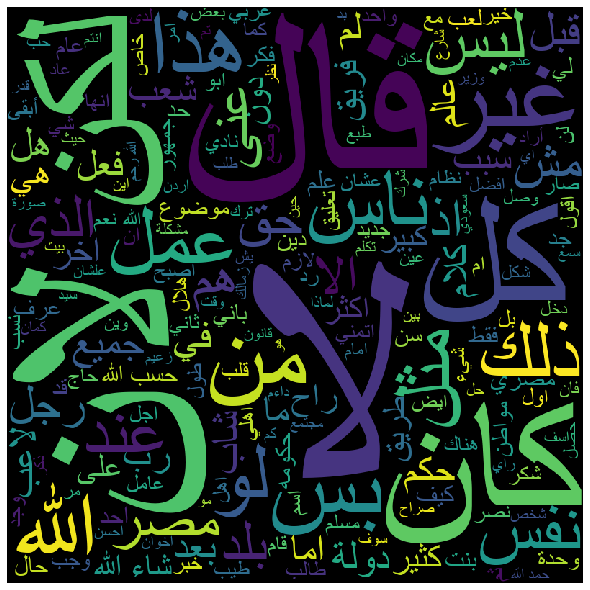

In [270]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                font_path='arial',
                min_font_size = 10).generate(text) 

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

plot_word_cloud(text_cloud) 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text,target,test_size=0.2, shuffle = True,  random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(text2,target2,test_size=0.2, shuffle = True,  random_state=42)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer() 
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts2 = count_vect.fit_transform(X_train2) 
tfidf_transformer = TfidfTransformer()
X_tfidf_train = tfidf_transformer.fit_transform(X_train_counts)
X_tfidf_train2 = tfidf_transformer.fit_transform(X_train_counts2)
X_test_counts = count_vect.transform(X_test) 
X_tfidf_test = tfidf_transformer.transform(X_test_counts)
X_test_counts2 = count_vect.transform(X_test2) 
X_tfidf_test2 = tfidf_transformer.transform(X_test_counts2)

In [164]:
#!pip install NearMiss

In [165]:
#from imblearn.under_sampling import NearMiss
#undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
#X, Y = undersample.fit_resample(X_tfidf_train, y_train)

In [7]:
X_tfidf_train2.shape

(61796, 51120)

In [8]:
X_tfidf_test2.shape

(15449, 51120)

In [ ]:
# Multinomial Naive Bayes classifier

In [9]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_tfidf_train2, y_train2)

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_tfidf_test2)

precision = accuracy_score(predicted, y_test2) * 100
print("Accuracy with Multinomial Naive Bayes: {0:.6f}".format(precision))

Accuracy with Multinomial Naive Bayes: 67.234125


In [12]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test2, predicted))

[[ 504   55    9 1331]
 [  12  942   11 2113]
 [  18  111  337 1324]
 [   9   64    5 8604]]


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test2,predicted))


              precision    recall  f1-score   support

    DIAL_EGY       0.93      0.27      0.41      1899
    DIAL_GLF       0.80      0.31      0.44      3078
    DIAL_LEV       0.93      0.19      0.31      1790
         MSA       0.64      0.99      0.78      8682

    accuracy                           0.67     15449
   macro avg       0.83      0.44      0.49     15449
weighted avg       0.74      0.67      0.61     15449



In [50]:
import pickle 
  
saved_MNB_model = pickle.dumps(clf) 
  
# Load the pickled model 
MNB_from_pickle = pickle.loads(saved_MNB_model) 
  


In [17]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pickle
import joblib

joblib.dump(clf, 'NB_Arabic_model.pkl')
NB_arabic_model = open('NB_Arabic_model.pkl','rb')
clf2 = joblib.load(NB_spam_model)


In [ ]:
# SVM Classifier

In [20]:
%%time
from sklearn import svm
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_tfidf_train2, y_train2)

Wall time: 31min


In [29]:
test_predictions = svm_clf.predict(X_tfidf_test2)

In [68]:
import numpy as np
from sklearn.metrics import accuracy_score
precision = accuracy_score(test_predictions, y_test2) * 100
print("Accuracy with SVM: {0:.6f}".format(precision))

Accuracy with SVM: 76.820506


In [69]:
import pickle
import joblib

joblib.dump(svm_clf, 'svm_Arabic_model.pkl')
svm_arabic_model = open('svm_Arabic_model.pkl','rb')
clf3 = joblib.load(svm_arabic_model)


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,test_predictions))

              precision    recall  f1-score   support

    DIAL_EGY       0.86      0.55      0.67      1899
    DIAL_GLF       0.73      0.53      0.62      3078
    DIAL_LEV       0.88      0.50      0.63      1790
         MSA       0.76      0.96      0.84      8682

    accuracy                           0.77     15449
   macro avg       0.80      0.63      0.69     15449
weighted avg       0.78      0.77      0.75     15449



In [23]:
saved_SVM_model = pickle.dumps(svm_clf) 
  
# Load the pickled model 
SVM_from_pickle = pickle.loads(saved_SVM_model) 

In [25]:
saved_SVM_model2 = pickle.dumps(svm_clf) 
  
# Load the pickled model 
SVM_from_pickle2 = pickle.loads(saved_SVM_model2) 

In [28]:
sentence = [""]

#sentence = ["   ياليت والله علشان  يريحنا"]
#sentence = ["يا راجل فن ايه هو ده فن دي قلة ادب"]
#sentence = ["انا مش عارف انا ايه جابني هنا"]
# مادري شفيني عليه  gulf ياخي شلون تبي تحقق مونديال وانت بدونه ضايع
#ليه بتقول كده علينا طيب يعم انت مالك اصلا؟
X_testing_counts = count_vect.transform(sentence) 
X_tfidf_testing = tfidf_transformer.transform(X_testing_counts)

SVM_from_pickle.predict(X_tfidf_testing)

array(['MSA'], dtype='<U8')

In [ ]:
#new algorithim

In [296]:
from xgboost import XGBClassifier
model = XGBClassifier(objective='multi:softmax')
model.fit(X_tfidf_train2, y_train2)
y_pred = model.predict(X_tfidf_test2)


C:\Users\dell\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [297]:

# evaluate predictions

accuracy = accuracy_score(y_test2, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.84%


In [143]:
sentence = ["اللهم أعننا علي ذكرك وشكرك وحسن عبادتك"]
#sentence = [" طب ايش هو الخلاف بالتحديد حتي يصير كل هالعقوبه "]
#sentence = ["ساعتين جد وكوباية شاي والمنهج ده هجيبه في شوال يابني انت والله متقلقش"]
#sentence = ["هي المشرحة ناقصه قتله  فكك مننا وروح شوف بلد تانيه تصيع فيها يابني انت "]
#sentence = ["وي يا علي وي وي يا علي ويي وي وي وي القاضييييه ممكن علييي معلولل  لا لا هذا ولدنا افشه محمد مجدي قفشه"]
#sentence = ["الاهلي خد بطولة كاس مصر وخد الدوري كمان عليه وانتو خليكو في المهلبيه اللي انتو فيها"]
#sentence = ["انت لسه مبقتش من شركاء اوبر !! :/الفرصه لسه فأديك .. و بـ 4 خطوات بس ;)1- هتجيب فيش وتشبيه موجه لشركه"]
#sentence = ["لو نمت دقيقة كمان زيادة هديك علي دماغك"]

#sentence = ["   ياليت والله علشان  يريحنا"]
#sentence = ["يا راجل فن ايه هو ده فن دي قلة ادب"]
#sentence = ["انا مش عارف انا ايه جابني هنا"]
# مادري شفيني عليه  gulf ياخي شلون تبي تحقق مونديال وانت بدونه ضايع
#ليه بتقول كده علينا طيب يعم انت مالك اصلا؟
X_testing_counts = count_vect.transform(sentence) 
X_tfidf_testing = tfidf_transformer.transform(X_testing_counts)

model.predict(X_tfidf_testing)

array(['MSA'], dtype='<U8')